In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/My Drive

/content/drive/My Drive


In [33]:
import pandas as pd
import numpy as np
import random
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import xgboost as xgb
%matplotlib inline

import warnings;
warnings.filterwarnings('ignore')

In [4]:
#reading dataset
df = pd.read_csv('preprocessed_file.csv', encoding = 'latin',engine='python')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   target   1600000 non-null  int64 
 1   content  1592549 non-null  object
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


In [25]:
#check for missing values
print(df.isnull().sum())
# remove missing values
df.dropna(inplace=True)
pos_data = df[df.target==1].iloc[:25000,:]
#print(pos_data.shape)
neg_data = df[df.target==0].iloc[:1000,:]
#print(neg_data.shape)
tweet_df = pd.concat([pos_data,neg_data],axis = 0)

target     0
content    0
dtype: int64


In [28]:
#divide 70-30% in train and test vectors
X_train, X_test, y_train, y_test = train_test_split(tweet_df['content'],tweet_df['target'], test_size=0.3)

In [34]:
# Generate counts from text using a vectorizer (Document term matrix)
vectorizer = TfidfVectorizer(stop_words='english',ngram_range=(1,2), max_df=0.90, min_df=2)
train_features = vectorizer.fit_transform([r for r in X_train])
#print('Train Vocabulary shape :',train_features.shape)
#print(vectorizer.vocabulary_)
test_features = vectorizer.transform([r for r in X_test])
#print('Test Vocabulary shape :',test_features.shape)
#print(vectorizer.vocabulary_)


In [36]:
clf1 = DecisionTreeClassifier()
clf1.fit(train_features, y_train)

# Now we can use the model to predict classifications for our test features.
predictions = clf1.predict(test_features)

# Compute the error.Results after classification
matrix = confusion_matrix(y_test, predictions)
accuracy=accuracy_score(y_test, predictions)
precision=precision_score(y_test, predictions)
recall=recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print("DecisionTree Classifier ")
print("Accuracy  : {:.4f}%".format(accuracy*100))
print("Precision : {:.4f}%".format(precision*100))
print("Recall    : {:.4f}%".format(recall*100))
print("F1-measure: {:.4f}%".format(f1*100))


DecisionTree Classifier 
Accuracy  : 93.3974%
Precision : 96.3731%
Recall    : 96.7716%
F1-measure: 96.5719%


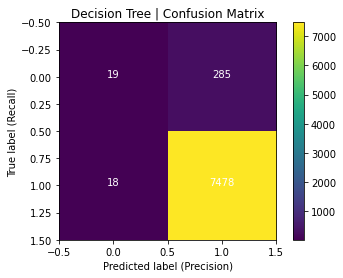

In [40]:
plt.imshow(matrix, interpolation='nearest')

for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
    plt.text(j, i, matrix[i, j],horizontalalignment="center",color="white")

plt.ylabel('True label (Recall)')
plt.xlabel('Predicted label (Precision)')
plt.title('Decision Tree | Confusion Matrix')
plt.colorbar()

In [38]:
clf2 = RandomForestClassifier(n_estimators=1000, random_state=42)
clf2.fit(train_features, y_train)

# Now we can use the model to predict classifications for our test features.
predictions = clf2.predict(test_features)

# Compute the error.Results after classification
matrix = confusion_matrix(y_test, predictions)
accuracy=accuracy_score(y_test, predictions)
precision=precision_score(y_test, predictions)
recall=recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print("Random Forest ")
print("Accuracy  : {:.4f}%".format(accuracy*100))
print("Precision : {:.4f}%".format(precision*100))
print("Recall    : {:.4f}%".format(recall*100))
print("F1-measure: {:.4f}%".format(f1*100))

Random Forest 
Accuracy  : 96.1154%
Precision : 96.3287%
Recall    : 99.7599%
F1-measure: 98.0143%


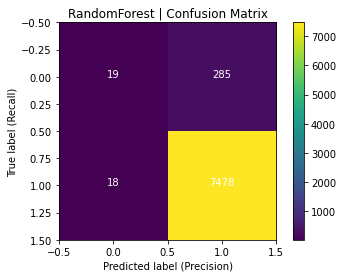

In [41]:
plt.imshow(matrix, interpolation='nearest')

for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
    plt.text(j, i, matrix[i, j],horizontalalignment="center",color="white")

plt.ylabel('True label (Recall)')
plt.xlabel('Predicted label (Precision)')
plt.title('RandomForest | Confusion Matrix')
plt.colorbar()

In [43]:
clf3 = XGBClassifier(max_depth=6, n_estimators=1000, nthread= 3)
clf3.fit(train_features, y_train)

# Now we can use the model to predict classifications for our test features.
predictions = clf3.predict(test_features)

# Compute the error.Results after classification
matrix = confusion_matrix(y_test, predictions)
accuracy=accuracy_score(y_test, predictions)
precision=precision_score(y_test, predictions)
recall=recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print("XGB Classifier")
print("Accuracy  : {:.4f}%".format(accuracy*100))
print("Precision : {:.4f}%".format(precision*100))
print("Recall    : {:.4f}%".format(recall*100))
print("F1-measure: {:.4f}%".format(f1*100))



XGB Classifier
Accuracy  : 96.0385%
Precision : 96.3737%
Recall    : 99.6265%
F1-measure: 97.9731%


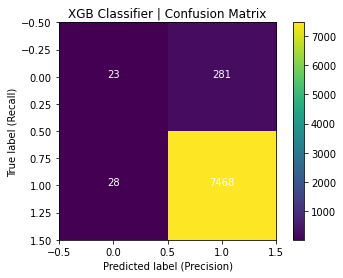

In [44]:
plt.imshow(matrix, interpolation='nearest')

for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
    plt.text(j, i, matrix[i, j],horizontalalignment="center",color="white")

plt.ylabel('True label (Recall)')
plt.xlabel('Predicted label (Precision)')
plt.title('XGB Classifier | Confusion Matrix')
plt.colorbar()